# Usage (quickest version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
from pprint import pprint

In [4]:
import covsirphy as cs
cs.__version__

'2.8.3-beta.new.224.fix.248'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [5]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)

Note:  
Datasets were retrieved via [COVID-19 Data Hub](https://covid19datahub.io/https://covid19datahub.io/) and the citation is  
Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

Scenario analysis can be performed for the following countries.

In [6]:
pprint(set(jhu_data.countries()) & set(population_data.countries()), compact=True)

{'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
 'Congo', 'Costa Atlantica', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 

## Start scenario analysis
As an example, we will analysis the number of cases in Italy.

In [7]:
scenario = cs.Scenario(jhu_data, population_data, country="Italy")

## Check records

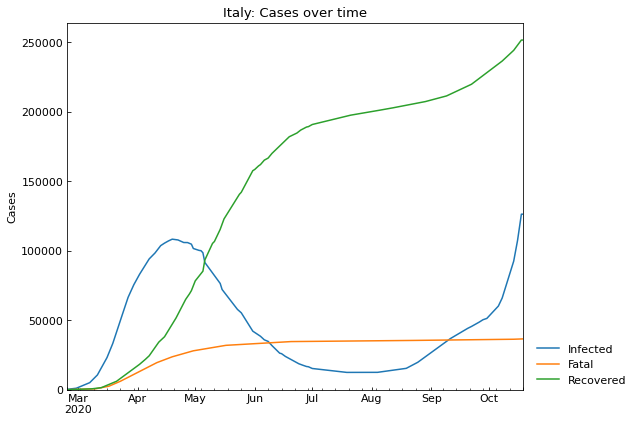

In [8]:
_ = scenario.records()

## S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters.

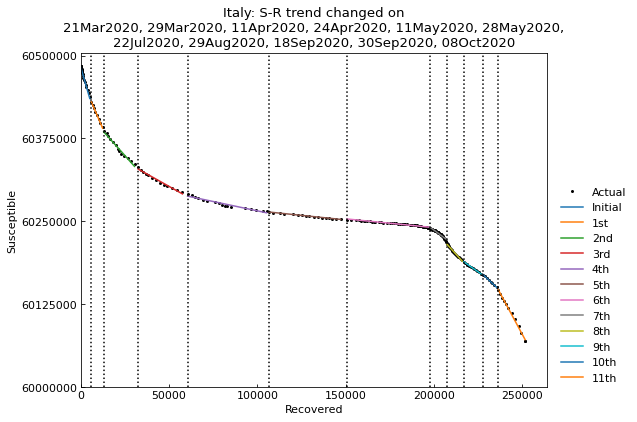

In [9]:
scenario.trend()

In [10]:
scenario.summary()

,Type,Start,End,Population
0th,Past,24Feb2020,20Mar2020,60483973
1st,Past,21Mar2020,28Mar2020,60483973
2nd,Past,29Mar2020,10Apr2020,60483973
3rd,Past,11Apr2020,23Apr2020,60483973
4th,Past,24Apr2020,10May2020,60483973
5th,Past,11May2020,27May2020,60483973
6th,Past,28May2020,21Jul2020,60483973
7th,Past,22Jul2020,28Aug2020,60483973
8th,Past,29Aug2020,17Sep2020,60483973
9th,Past,18Sep2020,29Sep2020,60483973


## Hyperparameter estimation of ODE models
As an example, use SIR-F model.

In [11]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	11th phase (08Oct2020 - 19Oct2020): finished  516 trials in 0 min 15 sec


	2nd phase (29Mar2020 - 10Apr2020): finished 1987 trials in 1 min  0 sec

	1st phase (21Mar2020 - 28Mar2020): finished 1985 trials in 1 min  0 sec

	0th phase (24Feb2020 - 20Mar2020): finished 1945 trials in 1 min  0 sec

	3rd phase (11Apr2020 - 23Apr2020): finished 1974 trials in 1 min  0 sec

	4th phase (24Apr2020 - 10May2020): finished  266 trials in 0 min  5 sec

	5th phase (11May2020 - 27May2020): finished  265 trials in 0 min  5 sec

	6th phase (28May2020 - 21Jul2020): finished  473 trials in 0 min 10 sec

	9th phase (18Sep2020 - 29Sep2020): finished  259 trials in 0 min  5 sec

	10th phase (30Sep2020 - 07Oct2020): finished  271 trials in 0 min  5 sec

	7th phase (22Jul2020 - 28Aug2020): finished 2076 trials in 1 min  0 sec

	8th phase (29Aug2020 - 17Sep2020): finished 2107 trials in 1 min  0 sec

Completed optimization. Total: 2 min 21 sec


## Show the history of reproduction number

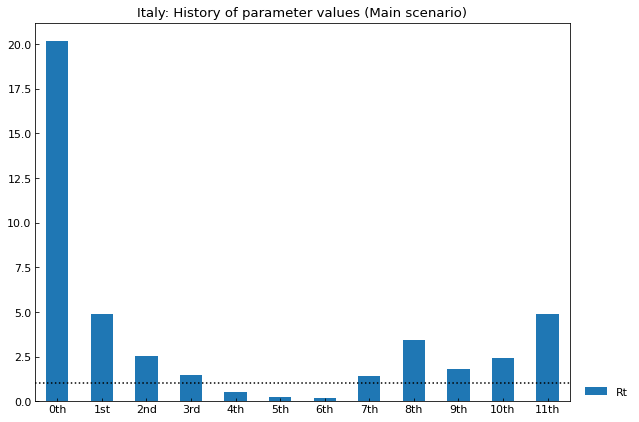

In [12]:
_ = scenario.param_history(targets=["Rt"], divide_by_first=False)

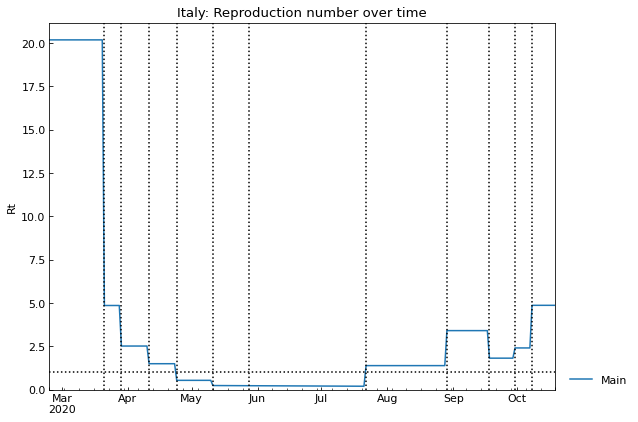

In [13]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

## Simulate the number of cases

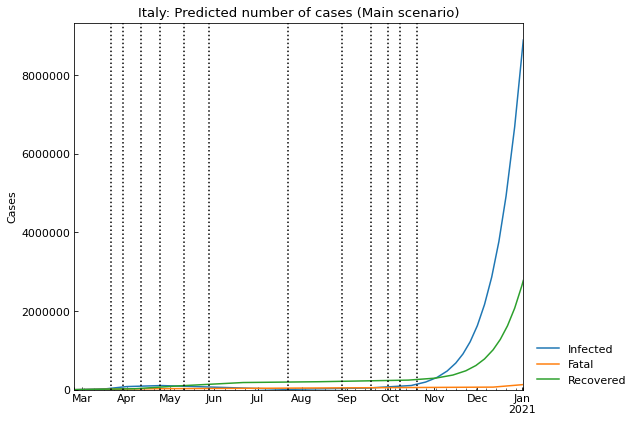

In [14]:
scenario.add(end_date="01Jan2021")
_ = scenario.simulate()